<a href="https://colab.research.google.com/github/Vishnu-Priya-03/visnu/blob/main/copy_of_proj_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
for dirname, _, filenames in os.walk('/data/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/PhiUSIIL_Phishing_URL_Dataset (1).csv")
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [ ]:
df.dtypes

,0
FILENAME,object
URL,object
URLLength,int64
Domain,object
DomainLength,int64
IsDomainIP,int64
TLD,object
URLSimilarityIndex,float64
CharContinuationRate,float64
TLDLegitimateProb,float64


In [ ]:
df_numeric = df.select_dtypes(include=['number'])

corr_matrix = df_numeric.corr()
corr_matrix.style.background_gradient(cmap='RdYlGn')

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
URLLength,1.000000,0.243091,0.277272,-0.421104,-0.241104,-0.016656,-0.245215,0.033339,0.071058,0.161980,0.459094,0.127472,0.956047,0.312632,0.835809,0.304379,0.685091,0.474901,0.500387,0.782582,0.199112,0.013117,-0.060636,0.045219,-0.075456,-0.215877,-0.193234,-0.094548,-0.073770,-0.082549,0.029975,-0.005168,-0.149104,-0.010952,-0.044875,-0.035443,-0.180909,-0.067420,-0.072551,0.021561,-0.031734,-0.057816,-0.025163,-0.126420,-0.064639,-0.014507,-0.078643,-0.074722,-0.023206,-0.059055,-0.233445
DomainLength,0.243091,1.000000,-0.041398,-0.420694,-0.577425,0.027209,-0.178104,0.152669,0.399157,0.041643,0.011304,0.021627,0.277602,0.547854,0.131709,0.289628,0.020033,0.064477,0.016320,0.272930,0.182803,-0.019218,-0.075171,0.067131,-0.107133,-0.296493,-0.328603,-0.148317,-0.082594,-0.119737,0.019387,-0.046803,-0.202821,-0.012502,-0.051687,-0.038560,-0.216055,-0.111077,-0.111882,0.009409,-0.039944,-0.065895,-0.034773,-0.196860,-0.083458,-0.017596,-0.102216,-0.096712,-0.031673,-0.070099,-0.283152
IsDomainIP,0.277272,-0.041398,1.000000,-0.121439,-0.101307,-0.053220,-0.111769,-0.011125,0.084619,0.001239,0.000354,0.000977,0.244300,-0.002630,0.224703,0.161257,0.288351,0.389523,0.178814,0.285846,0.115484,-0.011741,-0.016211,0.002159,-0.004602,-0.052033,-0.054458,-0.030890,-0.028261,-0.006481,0.023497,-0.010231,-0.021518,-0.002795,-0.009741,-0.007988,-0.046432,-0.011489,-0.011962,-0.008419,-0.015708,-0.013863,-0.005919,-0.022796,-0.016502,-0.004149,-0.023126,-0.018981,-0.006793,-0.015269,-0.060202
URLSimilarityIndex,-0.421104,-0.420694,-0.121439,1.000000,0.572938,0.162042,0.571622,-0.053915,-0.058481,-0.100159,-0.032257,-0.078989,-0.449120,-0.491761,-0.299591,-0.561238,-0.161075,-0.341722,-0.075346,-0.540554,-0.604885,0.346389,0.231147,-0.078496,0.352123,0.604045,0.543969,0.402334,0.313293,0.433413,-0.060840,-0.049634,0.590195,0.041042,0.191208,0.139202,0.673690,0.448227,0.404655,0.061553,0.151290,0.291542,0.087228,0.613620,0.235728,0.057683,0.315679,0.271590,0.091556,0.221960,0.860358
CharContinuationRate,-0.241104,-0.577425,-0.101307,0.572938,1.000000,0.237221,0.349810,0.051438,-0.482314,-0.036231,-0.004371,-0.021257,-0.252761,-0.304448,-0.158497,-0.343880,-0.068517,-0.145347,-0.034872,-0.425542,-0.711020,0.089170,0.133351,-0.068861,0.164529,0.550943,0.568560,0.213020,0.177268,0.206705,-0.031916,0.019089,0.340722,0.021262,0.127151,0.086036,0.380694,0.245257,0.220213,0.075026,0.095809,0.179145,0.059667,0.345566,0.135931,0.027943,0.183900,0.147881,0.049963,0.121745,0.467735
TLDLegitimateProb,-0.016656,0.027209,-0.053220,0.162042,0.237221,1.000000,0.274224,0.386794,-0.250048,-0.016577,0.001207,-0.010993,-0.004864,0.128466,-0.029101,-0.090831,-0.009376,-0.036019,-0.011255,-0.094307,-0.280275,0.043764,0.041658,-0.025272,0.005597,0.298565,0.296253,0.033452,0.058150,0.081560,-0.008145,-0.036884,0.119061,0.005316,0.093219,0.027294,0.097843,0.063004,0.075440,0.070310,0.085441,0.111494,0.038673,0.114394,0.053432,0.008296,0.058475,0.028216,0.015252,0.033182,0.097389
URLCharProb,-0.245215,-0.178104,-0.111769,0.571622,0.349810,0.274224,1.000000,0.069818,-0.081576,-0.056108,-0.029030,-0.044623,-0.214701,0.045577,-0.290734,-0.708875,-0.103363,-0.193290,-0.055230,-0.307038,-0.396982,0.161159,0.124884,-0.058660,0.156942,0.361329,0.331182,0.216097,0.1

In [ ]:
correlation_with_target = corr_matrix["label"].drop("label") #extracts the column of correlations between all features and the target variable (label)
print("Correlation with target:\n", correlation_with_target)

Correlation with target:
 URLLength                    -0.233445
DomainLength                 -0.283152
IsDomainIP                   -0.060202
URLSimilarityIndex            0.860358
CharContinuationRate          0.467735
TLDLegitimateProb             0.097389
URLCharProb                   0.469749
TLDLength                    -0.079159
NoOfSubDomain                -0.005955
HasObfuscation               -0.052473
NoOfObfuscatedChar           -0.015315
ObfuscationRatio             -0.041915
NoOfLettersInURL             -0.258090
LetterRatioInURL             -0.367794
NoOfDegitsInURL              -0.177980
DegitRatioInURL              -0.432032
NoOfEqualsInURL              -0.076963
NoOfQMarkInURL               -0.175621
NoOfAmpersandInURL           -0.034622
NoOfOtherSpecialCharsInURL   -0.358891
SpacialCharRatioInURL        -0.533537
IsHTTPS                       0.609132
LineOfCode                    0.272257
LargestLineLength            -0.041111
HasTitle                      0.459725

In [ ]:
# Identify features with low correlation to the target (e.g., abs(correlation) < 0.5)
low_correlation_features = correlation_with_target[correlation_with_target.abs() < 0.5].index.tolist()

#abs() method in Python is used to calculate the absolute value of numbers. In the context of a Pandas Series or DataFrame, it
#computes the absolute value of each element, ensuring all values are non-negative.

print("Low correlation features:", low_correlation_features)

Low correlation features: ['URLLength', 'DomainLength', 'IsDomainIP', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'HasFavicon', 'Robots', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef']


In [ ]:
df.drop(['URL', 'Domain', 'Title', 'URLLength', 'DomainLength', 'IsDomainIP', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'HasFavicon', 'Robots', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef'], axis = 1, inplace = True)
df

,FILENAME,TLD,URLSimilarityIndex,SpacialCharRatioInURL,IsHTTPS,DomainTitleMatchScore,URLTitleMatchScore,IsResponsive,HasDescription,HasSocialNet,HasSubmitButton,HasHiddenFields,HasCopyrightInfo,label
0,521848.txt,com,100.0,0.032,1.0,0.000000,0.000000,1.0,0.0,0.0,1.0,1.0,1.0,1.0
1,31372.txt,de,100.0,0.087,1.0,55.555556,55.555556,0.0,0.0,1.0,1.0,0.0,1.0,1.0
2,597387.txt,uk,100.0,0.069,1.0,46.666667,46.666667,1.0,1.0,0.0,1.0,1.0,1.0,1.0
3,554095.txt,com,100.0,0.038,1.0,0.000000,0.000000,1.0,0.0,1.0,1.0,1.0,1.0,1.0
4,151578.txt,org,100.0,0.030,1.0,100.000000,100.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22329,540917.txt,com,100.0,0.038,1.0,100.000000,100.000000,1.0,1.0,1.0,0.0,1.0,1.0,1.0
22330,123103.txt,fr,100.0,0.059,1.0,100.000000,100.000000,1.0,1.0,0.0,0.0,0.0,0.0,1.0
22331,564567.txt,com,100.0,0.038,1.0,100.000000,100.000000,1.0,0.0,1.0,1.0,1.0,1.0,1.0
22332,707795.txt,org,100.0,0.037,1.0,100.000000,100.000000,1.0,1.0,1.0,0.0,1.0,0.0,1.0


In [ ]:
X = df.drop('label', axis = 1) #feature
X


,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,...,1,0,0,1,34,20,28,119,0,124
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,...,0,0,0,1,50,9,8,39,0,217
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,...,0,0,0,1,10,2,7,42,2,5
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,...,0,1,1,1,3,27,15,22,1,31
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,...,1,1,0,1,244,15,34,72,1,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,0,1,0,1,51,7,21,187,2,191
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,0,1,0,0,50,1,7,88,0,31
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,0,1,27,10,30,58,2,67
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,0,3,0,0,0


In [ ]:
y = df['label'] #target
y

,label
0,1
1,1
2,1
3,1
4,1
...,...
235790,1
235791,1
235792,1
235793,0


In [ ]:
original_tlds = X['TLD'].unique()

In [ ]:
#converting TLD column into a numeric format with label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X['TLD_numeric'] = label_encoder.fit_transform(X['TLD'])
X

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,TLD_numeric
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,231
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,254
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,647
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,231
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,0,1,51,7,21,187,2,191,231
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50,1,7,88,0,31,647
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,157
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,258


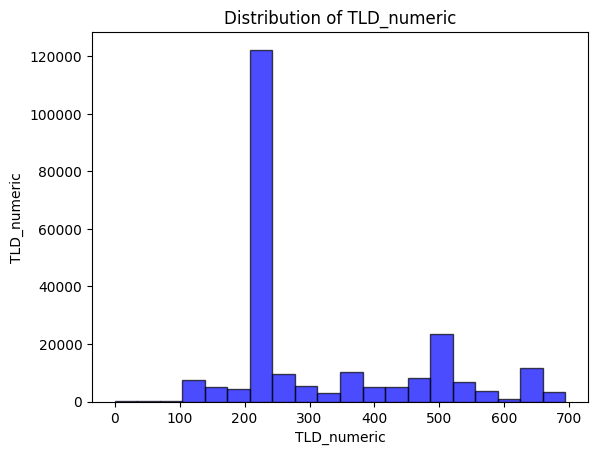

In [ ]:
import matplotlib.pyplot as plt

# Visualizing the distribution of 'TLD_numeric'
plt.hist(X['TLD_numeric'], bins=20, color='blue', edgecolor='k', alpha=0.7)
plt.title('Distribution of TLD_numeric')
plt.xlabel('TLD_numeric')
plt.ylabel('TLD_numeric')
plt.show()

In [ ]:
original_tlds = X['TLD'].unique()

In [ ]:
X.columns
X.drop(['TLD'], axis = 1, inplace = True)
X

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,TLD_numeric
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,100.000000,1.000000,0.522907,0.061933,...,0,0,1,34,20,28,119,0,124,231
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,100.000000,0.666667,0.032650,0.050207,...,0,0,1,50,9,8,39,0,217,254
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,100.000000,0.866667,0.028555,0.064129,...,0,0,1,10,2,7,42,2,5,647
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,100.000000,1.000000,0.522907,0.057606,...,1,1,1,3,27,15,22,1,31,231
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,100.000000,1.000000,0.079963,0.059441,...,1,0,1,244,15,34,72,1,85,503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,100.000000,1.000000,0.522907,0.058739,...,1,0,1,51,7,21,187,2,191,231
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,100.000000,0.785714,0.028555,0.053834,...,1,0,0,50,1,7,88,0,31,647
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,100.000000,1.000000,0.003319,0.063093,...,0,0,1,27,10,30,58,2,67,157
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,28.157537,0.465116,0.000961,0.050211,...,0,0,0,0,0,3,0,0,0,258


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#Train a neural network on the features

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(128, activation = 'relu', input_dim = X_train.shape[1], name = 'dense'))
model.add(Dense(1, activation='sigmoid', name='dense_1'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,921 (7.50 KB)

 Trainable params: 1,921 (7.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split  # Importing train_test_split

# Assuming X and y are already defined (from your previous cells)
# Define X and y if they are not already defined:
# X = ...  # Load or create your feature data here
# y = ...  # Load or create your target variable data here
# The following line is causing the error because it is called before defining X and y
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Defining X_train, etc.

# Load or create your feature data (X) and target variable data (y) here
# Example:
# X = pd.DataFrame(...)  # Replace ... with your data
# y = pd.Series(...)    # Replace ... with your data

# Now that X and y are defined, you can call train_test_split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# ... (rest of your code for label encoding and model training)

NameError: name 'X' is not defined

140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Raw model output (first 5): [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Prediction dtype: float32
Accuracy: 0.5946
Recall: 1.0000
F1 Score: 0.7458
Precision: 0.5946


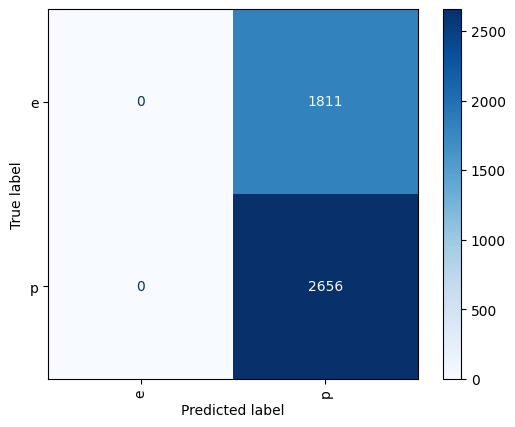

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import seaborn as sns

sns.reset_orig()

# Ensure X_test is numeric
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Debug prediction output
try:
    y_probabilities = model.predict(X_test)  # Raw predictions
    print("Raw model output (first 5):", y_probabilities[:5])
    print("Prediction dtype:", y_probabilities.dtype)

    # Ensure predictions are numeric
    if isinstance(y_probabilities, list):
        y_probabilities = np.array(y_probabilities, dtype=float)
    elif y_probabilities.dtype == object:
        y_probabilities = y_probabilities.astype(float)

except Exception as e:
    print(f"Error during prediction: {e}")
    raise

# Convert probabilities to binary class labels
y_predicted = (y_probabilities > 0.5).astype(int)

# Evaluate performance
accuracy = accuracy_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")

# Confusion Matrix
labels = ['e', 'p']
ConfusionMatrixDisplay.from_predictions(y_test, y_predicted, display_labels=labels, cmap='Blues', xticks_rotation='vertical')
